## Scraping tables from a web-page
Testing out a function for scraping html-tables on web-pages, using *BeautifulSoup*,
*urllib.request* and *html_table_parser*. 

Source of our scraped test-table: https://www.ibiblio.org/units/large.html

Preview of the table (from ibiblio.org/units/large.html):



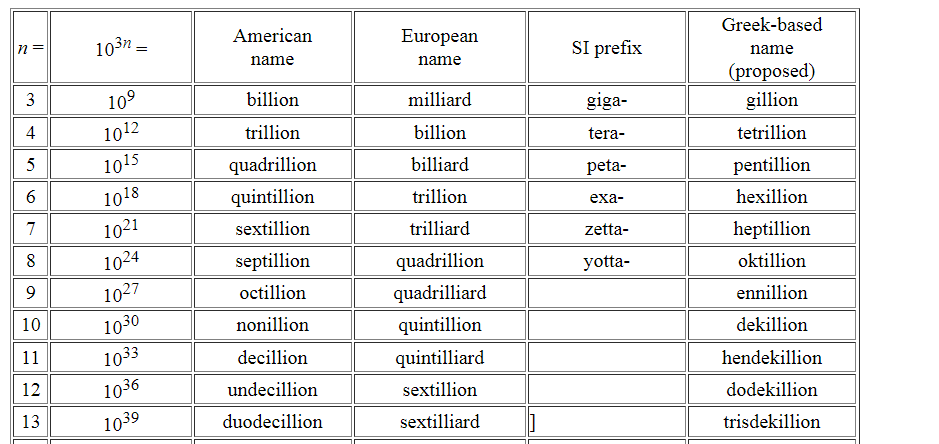

In [1]:
from PIL import Image

url = 'https://www.ibiblio.org/units/large.html'

print(f"Preview of the table (from {url[12:]}):\n")
Image.open('table_preview.png')

### Our table-scraping function:

In [2]:
import pandas as pd

def webtables(target, disc=True):
    from bs4 import BeautifulSoup
    import urllib.request as ur

    from html_table_parser import HTMLTableParser
    
    if disc == True:
        print("Need improvements -> user-rotation")
        
    headers = {'User-Agent': 'okay'}
    try:
        req = ur.Request(url=target)
        f = ur.urlopen(req)
        xhtml = f.read().decode('utf-8')
        p = HTMLTableParser()
        p.feed(xhtml)
        
        return p.tables 
    
    except: # Trying again with user-agent
        req = ur.Request(url=target,headers=headers)
        f = ur.urlopen(req)
        xhtml = f.read().decode('utf-8')
        p = HTMLTableParser()
        p.feed(xhtml)
        
        return p.tables

### Raw table scraped:

In [3]:
nums_webtable = webtables('https://www.ibiblio.org/units/large.html', disc=False)
nums_df = pd.DataFrame(*nums_webtable)
nums_df.head()

,0,1,2,3,4,5
0,n =,10 3 n =,American name,European name,SI prefix,Greek-based name (proposed)
1,3,10 9,billion,milliard,giga-,gillion
2,4,10 12,trillion,billion,tera-,tetrillion
3,5,10 15,quadrillion,billiard,peta-,pentillion
4,6,10 18,quintillion,trillion,exa-,hexillion


#### Here's a more sanitized table (for a project of mine):

In [4]:
nums_df = nums_df[1:]
nums_df['n'] =  nums_df.index+2

nums_df.set_index('n', inplace=True)
nums_df.rename(columns={2:'name'}, inplace=True)
nums_df['10^3n'] = [f'{i:,}' for i in 10**(3*nums_df.index.values)]

nums_df = nums_df[['name','10^3n']]

nums_df.head()

,name,10^3n
n,,
3,billion,"1,000,000,000"
4,trillion,"1,000,000,000,000"
5,quadrillion,"1,000,000,000,000,000"
6,quintillion,"1,000,000,000,000,000,000"
7,sextillion,"3,875,820,019,684,212,736"
